In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.patches as mpatches

from os import listdir
from os.path import isfile, join
import os
cwd = os.getcwd()
print(cwd)

e:\hydro\smap_hb\cypress_creek


In [38]:
rainfall_list = ["data/fws/rainfall//1185//" + f for f in listdir("data/fws/rainfall//1185//") if isfile(join("data/fws/rainfall//1185//", f))]
print(rainfall_list)
 
rainfall = pd.read_excel(rainfall_list[0])
for xls in rainfall_list[1:]:
    xls_file = pd.read_excel(xls)
    rainfall = pd.concat([rainfall, xls_file], axis=0)

rainfall = rainfall.sort_values(by='Reading Date From')
soil_saturation = pd.read_excel("data\\fws\\soil_moisture\\1185\\1185 Soil Saturation 2019-31-12.xls")
soil_saturation = soil_saturation.sort_values(by="Reading Date")


['data/fws/rainfall//1185//1185 Rainfall 2019-31-12.xls', 'data/fws/rainfall//1185//1185 Rainfall 2015-31-12.xls', 'data/fws/rainfall//1185//1185 Rainfall 2016-31-12.xls', 'data/fws/rainfall//1185//1185 Rainfall 2017-31-12.xls', 'data/fws/rainfall//1185//1185 Rainfall 2018-31-12.xls']
WARNING *** file size (34367) not 512 + multiple of sector size (512)
WARNING *** file size (34367) not 512 + multiple of sector size (512)
WARNING *** file size (34453) not 512 + multiple of sector size (512)
WARNING *** file size (34367) not 512 + multiple of sector size (512)
WARNING *** file size (34367) not 512 + multiple of sector size (512)
WARNING *** file size (19835) not 512 + multiple of sector size (512)


In [39]:
stage_list = ["data/fws/stage//1185//" + f for f in listdir("data/fws/stage//1185//") if isfile(join("data/fws/stage/1185//", f))]
print(stage_list)
 
stage = pd.read_excel(stage_list[0])
for xls in stage_list[1:]:
    xls_file = pd.read_excel(xls)
    stage = pd.concat([stage, xls_file], axis=0)

stage = stage.sort_values(by='Reading Date')
# print(stage)

['data/fws/stage//1185//1185 Stream 2019-31-12.xls', 'data/fws/stage//1185//1185 Stream 2015-31-12.xls', 'data/fws/stage//1185//1185 Stream 2016-31-12.xls', 'data/fws/stage//1185//1185 Stream 2017-31-12.xls', 'data/fws/stage//1185//1185 Stream 2018-31-12.xls']
WARNING *** file size (34349) not 512 + multiple of sector size (512)
WARNING *** file size (33747) not 512 + multiple of sector size (512)
WARNING *** file size (33747) not 512 + multiple of sector size (512)
WARNING *** file size (34349) not 512 + multiple of sector size (512)
WARNING *** file size (34349) not 512 + multiple of sector size (512)


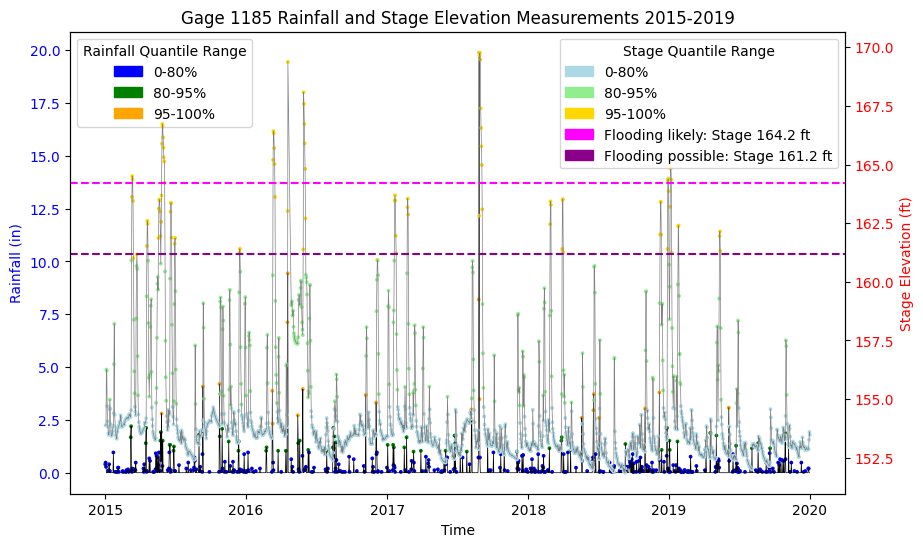

0.00     0.040
0.80     0.960
0.95     2.212
1.00    19.880
Name: Rain, dtype: float64


In [40]:
# Set up the plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Filter out zero rainfall for quantile calculation
non_zero_rainfall = rainfall[rainfall["Rain"] != 0]

# Calculate quantiles only for non-zero rainfall values
rainfall_quantiles = pd.qcut(non_zero_rainfall["Rain"], q=[0, 0.8, 0.95, 1], labels=False)

# Define colors for the quantiles
rainfall_colors = np.array(['blue', 'green', 'orange', 'red'])

# Plot all rainfall data (black line), but color non-zero rainfall based on quantiles
ax1.plot(rainfall["Reading Date From"], rainfall["Rain"], color="black", linewidth=0.5)
sc1 = ax1.scatter(non_zero_rainfall["Reading Date From"], non_zero_rainfall["Rain"], 
                  c=rainfall_colors[rainfall_quantiles], s=3, label='Rainfall')

# Set labels and axis settings
ax1.set_xlabel("Time")
ax1.set_ylabel("Rainfall (in)", color="blue")
ax1.tick_params(axis='y', labelcolor="blue")

# Create a second y-axis for stage data
ax2 = ax1.twinx()

# Calculate quantiles for stage data
stage_quantiles = pd.qcut(stage["Elevation"], q=[0, 0.8, 0.95, 1], labels=False)
stage_colors = np.array(['lightblue', 'lightgreen', 'gold', 'magenta'])

# Plot stage data (gray line), color based on quantiles
ax2.plot(stage["Reading Date"], stage["Elevation"], color="gray", linewidth=0.5)
sc2 = ax2.scatter(stage["Reading Date"], stage["Elevation"], 
                  c=stage_colors[stage_quantiles], s=3, label='Stage Elevation')

# Set labels for the second y-axis
ax2.set_ylabel("Stage Elevation (ft)", color="red")
ax2.tick_params(axis='y', labelcolor="red")

# Define custom legend patches for rainfall quantiles
legend_labels_rainfall = ['0-80%', '80-95%', '95-100%']
rainfall_patches = [mpatches.Patch(color=rainfall_colors[i], label=legend_labels_rainfall[i]) for i in range(3)]

# Define custom legend patches for stage quantiles
legend_labels_stage = ['0-80%', '80-95%', '95-100%']
stage_patches = [mpatches.Patch(color=stage_colors[i], label=legend_labels_stage[i]) for i in range(3)]

# Add the legends
ax1.legend(handles=rainfall_patches, title="Rainfall Quantile Range", loc='upper left')

# Add horizontal lines for flooding stages
ax2.axhline(y=161.2, color='darkmagenta', linestyle='--', label=f'Flooding possible: Stage {161.2} ft')
ax2.axhline(y=164.2, color='magenta', linestyle='--', label=f'Flooding likely: Stage {164.2} ft')

# Add legend for stage quantiles and flooding stages
ax2.legend(handles=stage_patches + [mpatches.Patch(color='magenta', label=f'Flooding likely: Stage {164.2} ft')] +
               [mpatches.Patch(color='darkmagenta', label=f'Flooding possible: Stage {161.2} ft')], 
               title="Stage Quantile Range", loc='upper right')

# Set the title
plt.title("Gage 1185 Rainfall and Stage Elevation Measurements 2015-2019")

# Show the plot
plt.show()

# Print the quantiles for non-zero rainfall data
print(non_zero_rainfall["Rain"].quantile([0, 0.8, 0.95, 1]))


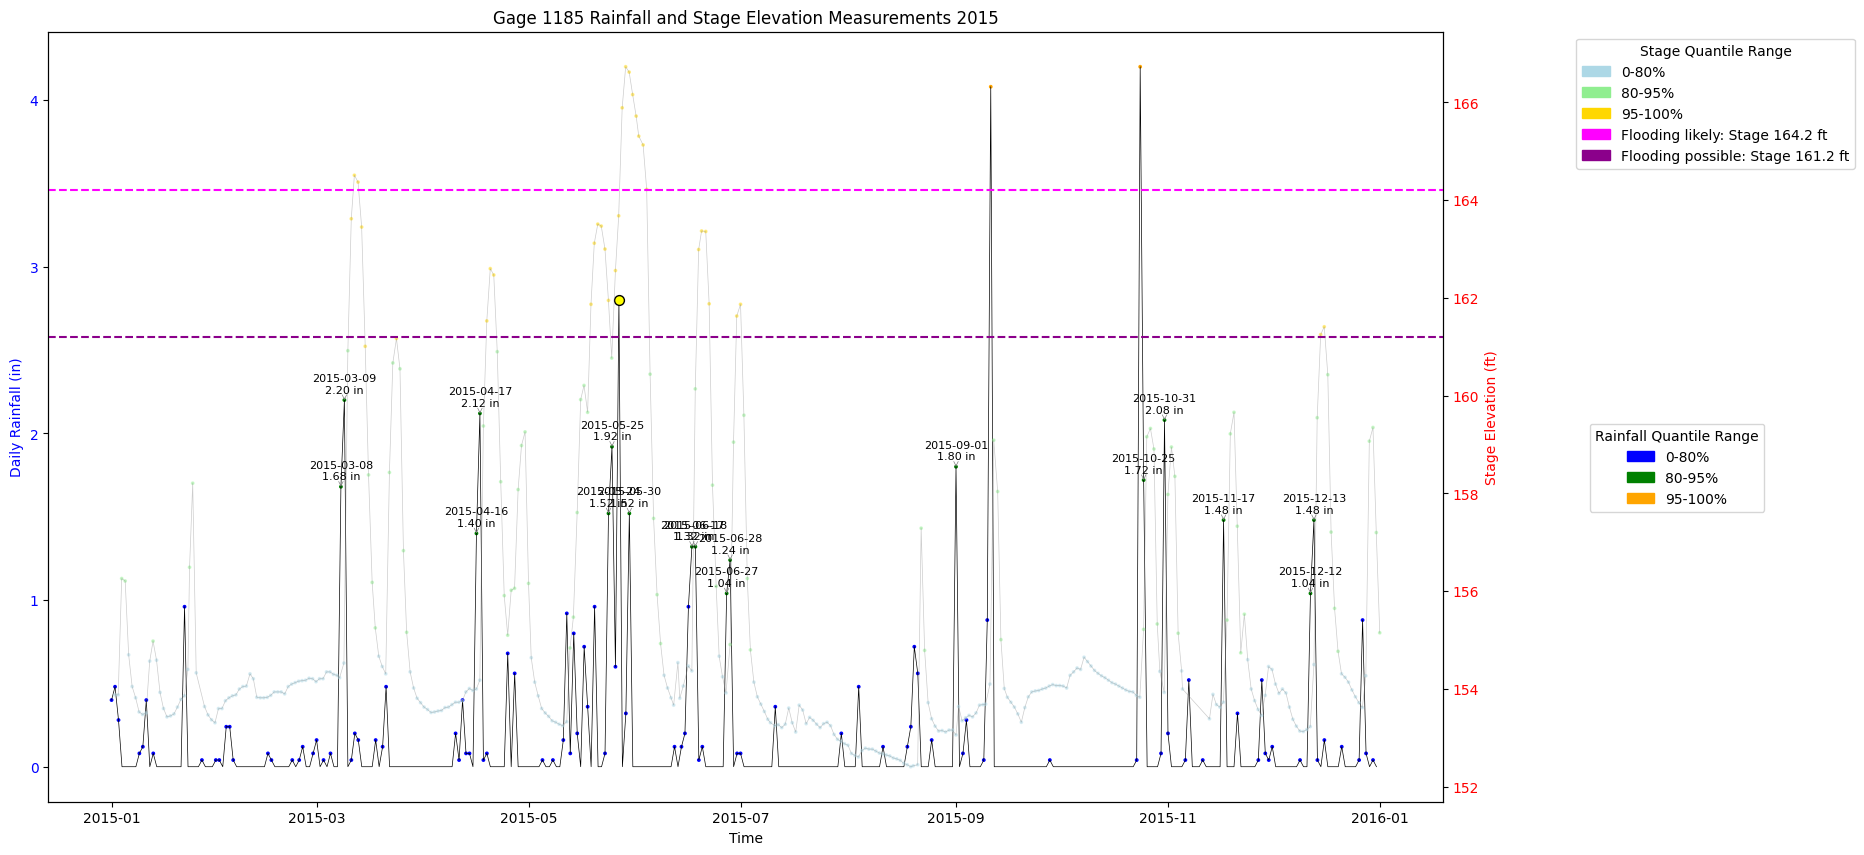

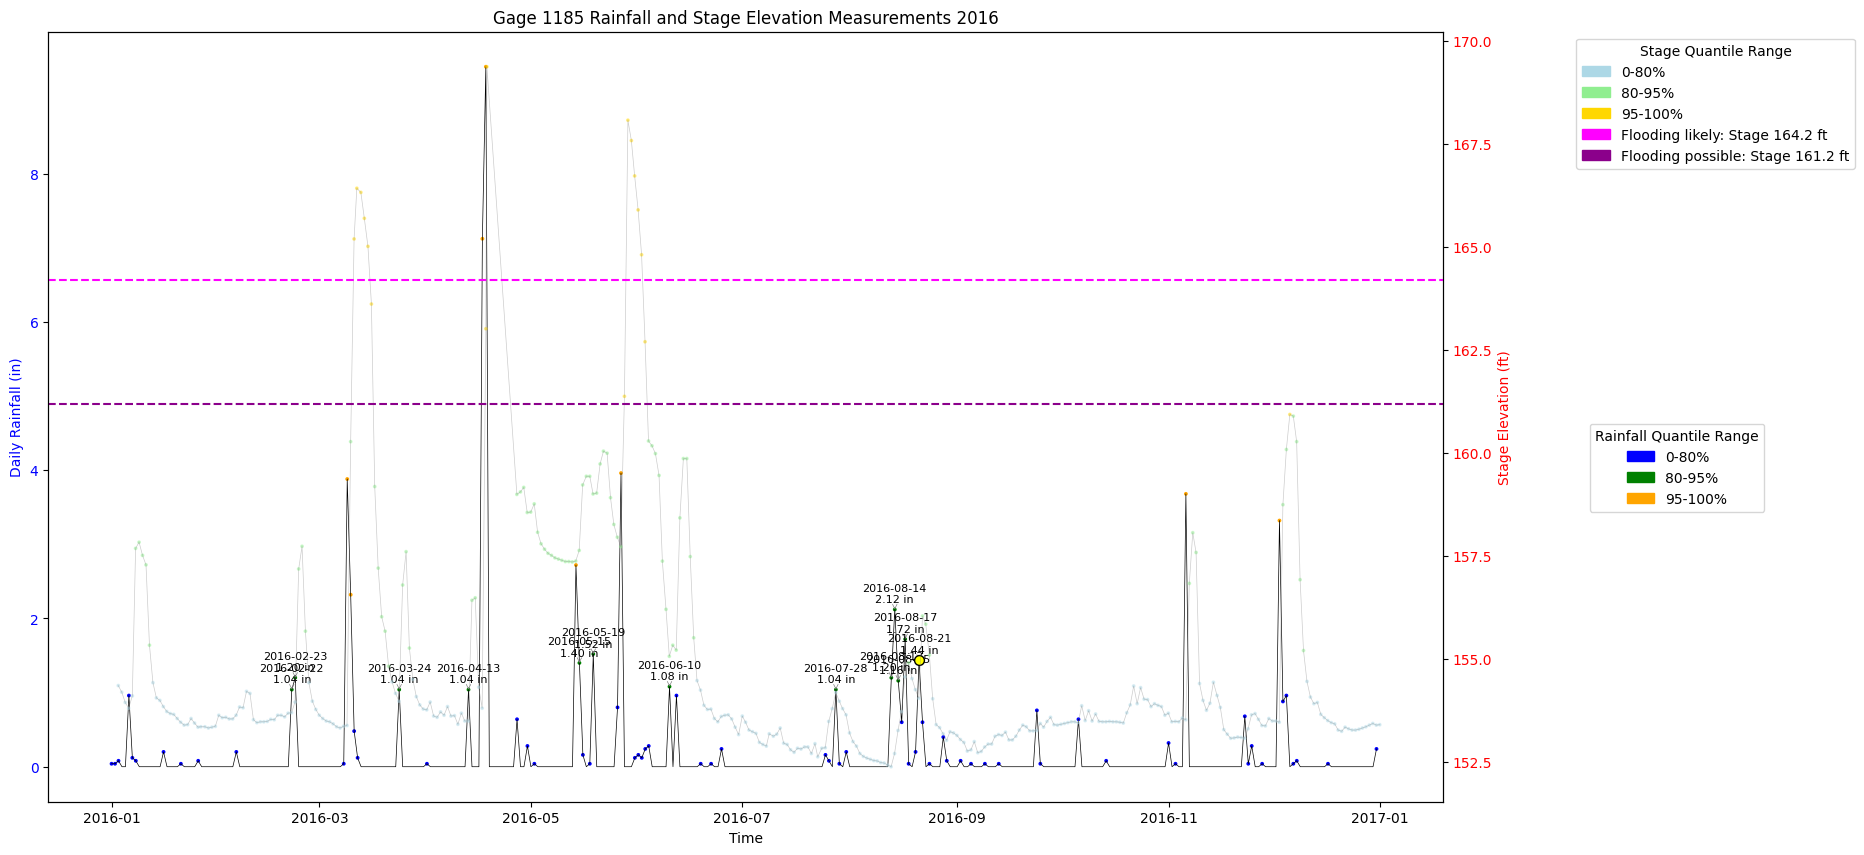

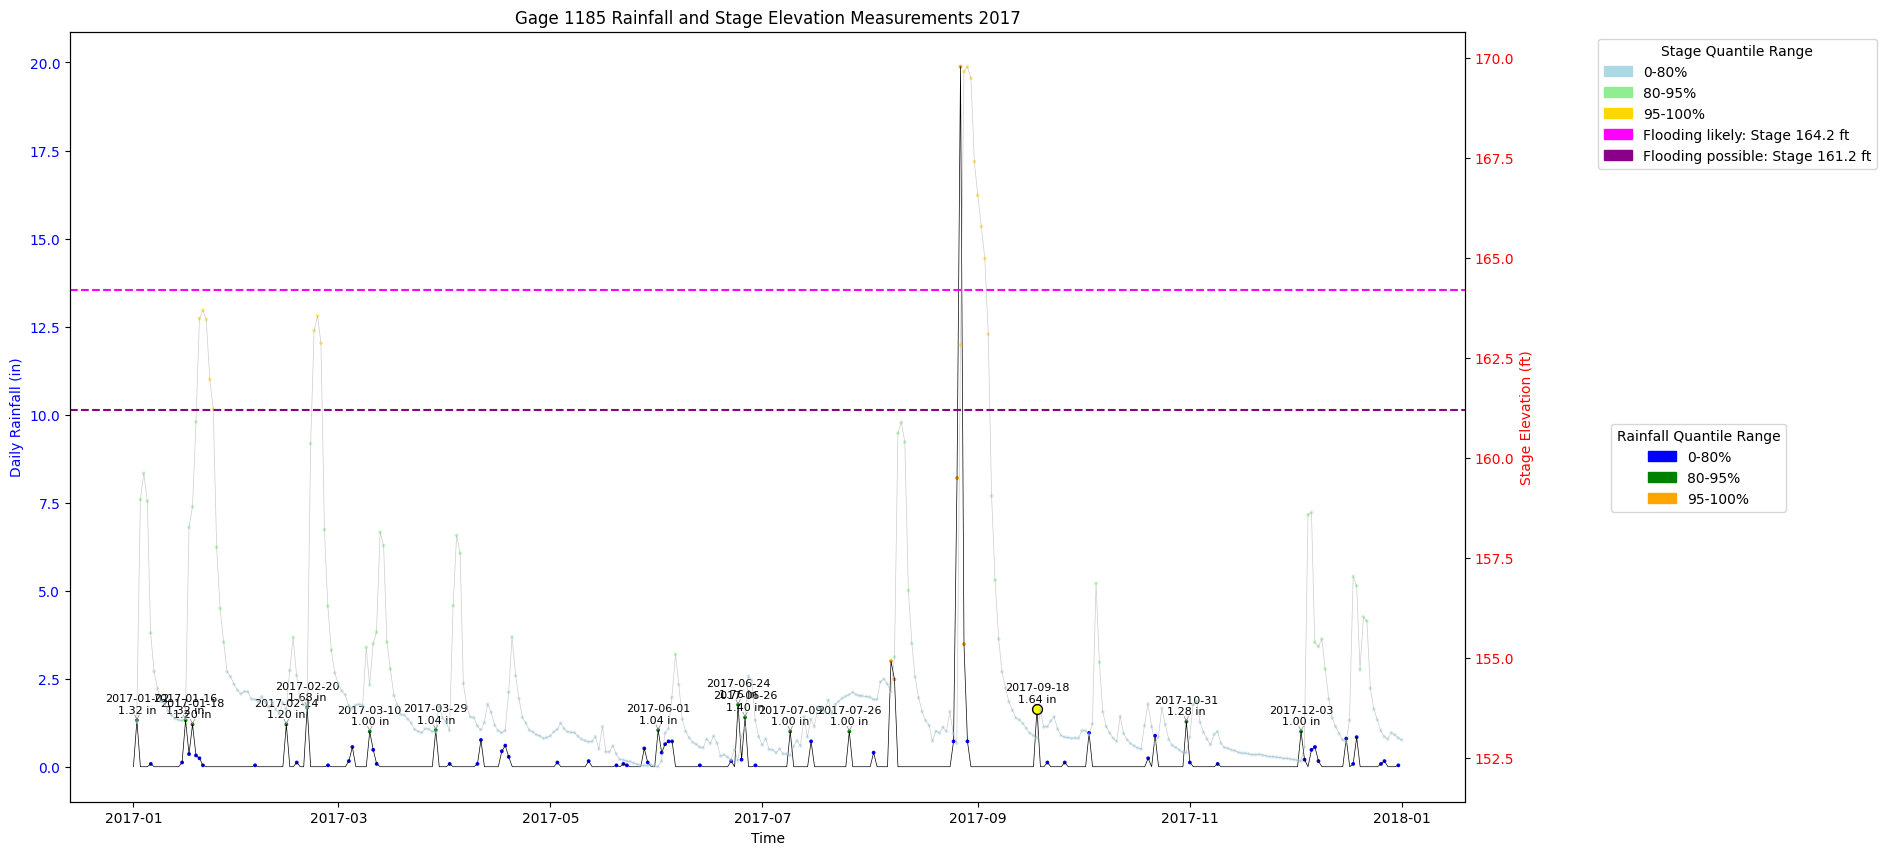

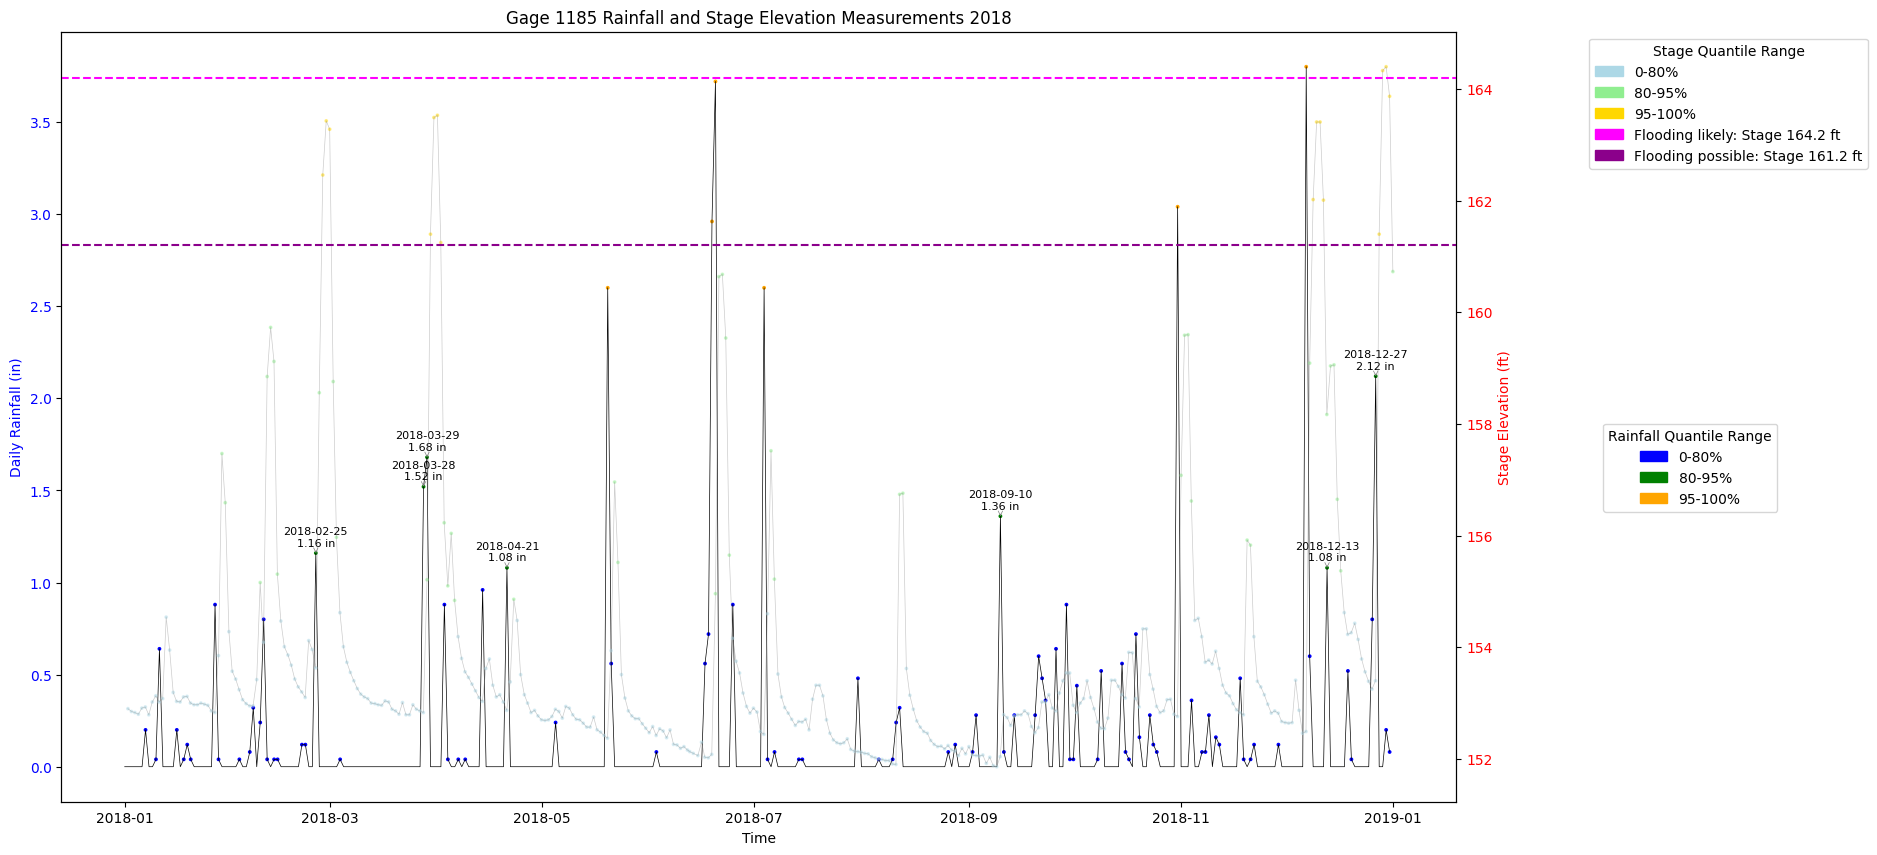

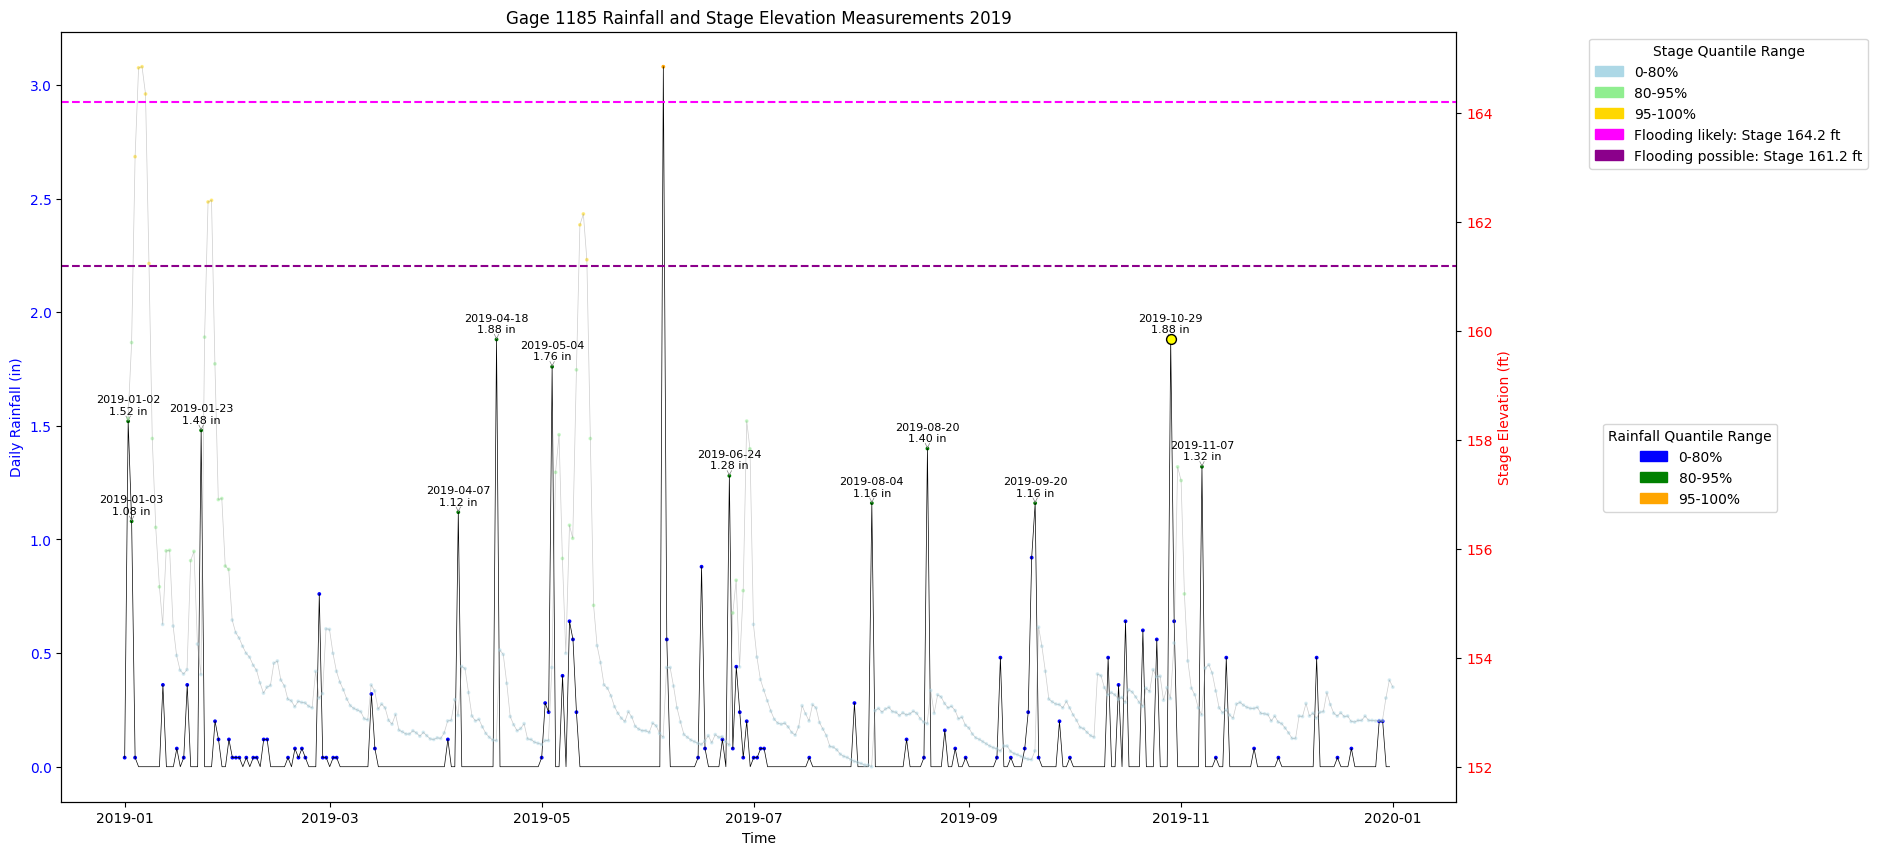

In [46]:
# Define specific dates to highlight (example dates, replace with your actual dates)
highlight_dates = pd.to_datetime(['2019-10-29', '2017-09-18', '2016-08-21', '2015-05-27'])  # Replace with actual dates

# Loop through each year and plot
for year in [2015, 2016, 2017, 2018, 2019]:
    # Filter rainfall and stage data for the specific year
    rainfall_subset = rainfall[rainfall["Reading Date From"].dt.year == year]
    stage_subset = stage[stage["Reading Date"].dt.year == year]

    # Apply quantiles from the whole dataset to the subset
    rainfall_subset_with_quantiles = rainfall_subset[rainfall_subset["Rain"] != 0].copy()
    rainfall_subset_with_quantiles["quantile"] = pd.cut(
        rainfall_subset_with_quantiles["Rain"], 
        bins=[0, non_zero_rainfall["Rain"].quantile(0.8), non_zero_rainfall["Rain"].quantile(0.95), non_zero_rainfall["Rain"].max()], 
        labels=False
    )

    # Plot setup
    fig, ax1 = plt.subplots(figsize=(18, 10))

    # Plot rainfall with quantile-based coloring
    ax1.plot(rainfall_subset["Reading Date From"], rainfall_subset["Rain"], color="black", linewidth=0.5)
    sc1 = ax1.scatter(
        rainfall_subset_with_quantiles["Reading Date From"], 
        rainfall_subset_with_quantiles["Rain"], 
        c=rainfall_colors[rainfall_subset_with_quantiles["quantile"].values], 
        s=3, 
        label='Rainfall Subset'
    )

    # Highlight specific rainfall dates with yellow markers
    highlighted_rainfall = rainfall_subset[rainfall_subset["Reading Date From"].isin(highlight_dates)]
    ax1.scatter(
        highlighted_rainfall["Reading Date From"], 
        highlighted_rainfall["Rain"], 
        color='yellow', 
        edgecolor='black', 
        s=50, 
        zorder=5,  # Ensure it appears on top
        label="Highlighted Dates"
    )

    ax1.set_xlabel("Time")
    ax1.set_ylabel("Daily Rainfall (in)", color="blue")
    ax1.tick_params(axis='y', labelcolor="blue")

    # Highlight and annotate high quantile rainfall (95-100% quantile)
    high_quantile_dates = rainfall_subset_with_quantiles[rainfall_subset_with_quantiles["quantile"] == 1]

    for _, row in high_quantile_dates.iterrows():
        ax1.annotate(
            f"{row['Reading Date From'].date()}\n{row['Rain']:.2f} in",  # Annotate with date and rain value
            (row["Reading Date From"], row["Rain"]),
            textcoords="offset points",
            xytext=(0, 5),  # Offset for visibility
            ha='center',
            fontsize=8,
            color='black',
            arrowprops=dict(arrowstyle="->", color='gray', lw=0.5)  # Optional arrow
        )

    # Create a second y-axis for stage data
    ax2 = ax1.twinx()

    # Recalculate stage quantiles for the year based on the entire stage dataset
    stage_quantiles = pd.qcut(stage["Elevation"], q=[0, 0.8, 0.95, 1], labels=False)
    stage_subset_quantiles = stage_quantiles[stage["Reading Date"].dt.year == year]

    # Plot stage data with quantile-based coloring
    ax2.plot(stage_subset["Reading Date"], stage_subset["Elevation"], color="gray", linewidth=0.5, alpha=0.4)
    sc2 = ax2.scatter(
        stage_subset["Reading Date"], 
        stage_subset["Elevation"], 
        alpha=0.4,
        c=stage_colors[stage_subset_quantiles], 
        s=3, 
        label='Stage Elevation'
    )

    # Add horizontal lines for flood levels
    ax2.axhline(y=161.2, color='darkmagenta', linestyle='--', label=f'Flooding possible: Stage {161.2} ft')
    ax2.axhline(y=164.2, color='magenta', linestyle='--', label=f'Flooding likely: Stage {164.2} ft')

    ax2.set_ylabel("Stage Elevation (ft)", color="red")
    ax2.tick_params(axis='y', labelcolor="red")

    # Legends for rainfall quantiles
    legend_labels_rainfall_subset = ['0-80%', '80-95%', '95-100%']
    rainfall_subset_patches = [mpatches.Patch(color=rainfall_colors[i], label=legend_labels_rainfall_subset[i]) for i in range(3)]

    # Legends for stage quantiles
    legend_labels_stage_subset = ['0-80%', '80-95%', '95-100%']
    stage_subset_patches = [mpatches.Patch(color=stage_colors[i], label=legend_labels_stage_subset[i]) for i in range(3)]

    # Add legends and set their locations
    ax1.legend(handles=rainfall_subset_patches, title="Rainfall Quantile Range", loc='upper left', bbox_to_anchor=(1.1, 0.5))
    ax2.legend(handles=stage_subset_patches + 
               [mpatches.Patch(color='magenta', label=f'Flooding likely: Stage {164.2} ft')] +
               [mpatches.Patch(color='darkmagenta', label=f'Flooding possible: Stage {161.2} ft')],
               title="Stage Quantile Range", loc='upper right', bbox_to_anchor=(1.3, 1))

    # Set title for each year
    plt.title(f"Gage 1185 Rainfall and Stage Elevation Measurements {year}")

    # Save the figure
    plt.savefig(f'figures/rainfall_stage_{year}.png', bbox_inches='tight')

    # Display the plot
    plt.show()


In [42]:
# Get unique soil depth values
unique_depths = soil_saturation["Soil Depth"].unique()

# Define a color for each unique soil depth
colors_soil_sat = plt.cm.viridis(np.linspace(0, 1, len(unique_depths)))

# plt.figure(figsize=(10, 6))

# # Plot each soil depth with a different color
# for i, depth in enumerate(unique_depths):
#     subset = soil_saturation[soil_saturation["Soil Depth"] == depth]
#     plt.scatter(subset["Reading Date"], subset["Soil Saturation"], color=colors_soil_sat[i], s=20, label=f' {depth} in')

# # Create a legend for the soil depths
# plt.legend(title="Soil Depth", loc='upper right')

# plt.title("Gage 1185 Soil Saturation Measurements Available 2019")
# plt.xlabel("Time")
# plt.ylabel("Soil Saturation (%)")

# plt.show()

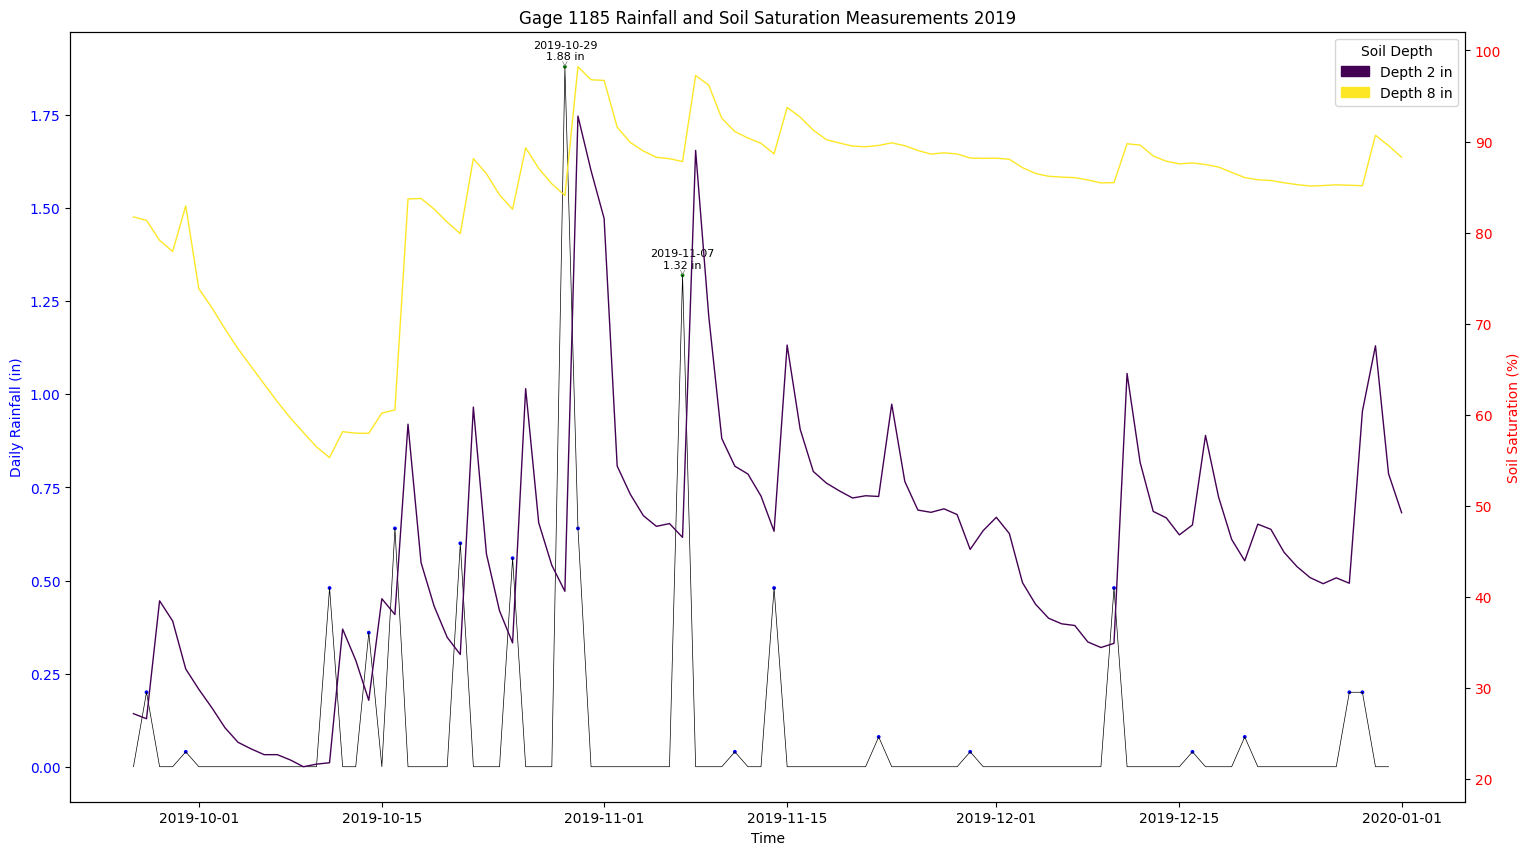

In [44]:
# Filter rainfall data within the soil saturation date range
rainfall_subset = rainfall[(rainfall['Reading Date From'] >= soil_saturation['Reading Date'].min()) & 
                           (rainfall['Reading Date From'] <= soil_saturation['Reading Date'].max())]

# Apply quantiles from the whole dataset to the subset
rainfall_subset_with_quantiles = rainfall_subset[rainfall_subset["Rain"] != 0].copy()
rainfall_subset_with_quantiles["quantile"] = pd.cut(
    rainfall_subset_with_quantiles["Rain"], 
    bins=[0, non_zero_rainfall["Rain"].quantile(0.8), non_zero_rainfall["Rain"].quantile(0.95), non_zero_rainfall["Rain"].max()], 
    labels=False
)

# Plot setup
fig, ax1 = plt.subplots(figsize=(18, 10))

# Plot rainfall with quantile-based coloring
ax1.plot(rainfall_subset["Reading Date From"], rainfall_subset["Rain"], color="black", linewidth=0.5)
sc1 = ax1.scatter(
    rainfall_subset_with_quantiles["Reading Date From"], 
    rainfall_subset_with_quantiles["Rain"], 
    c=rainfall_colors[rainfall_subset_with_quantiles["quantile"].values], 
    s=3, 
    label='Rainfall Subset'
)

ax1.set_xlabel("Time")
ax1.set_ylabel("Daily Rainfall (in)", color="blue")
ax1.tick_params(axis='y', labelcolor="blue")

# Highlight and annotate high quantile rainfall (95-100% quantile)
high_quantile_dates = rainfall_subset_with_quantiles[rainfall_subset_with_quantiles["quantile"] == 1]

for _, row in high_quantile_dates.iterrows():
    ax1.annotate(
        f"{row['Reading Date From'].date()}\n{row['Rain']:.2f} in",  # Annotate with date and rain value
        (row["Reading Date From"], row["Rain"]),
        textcoords="offset points",
        xytext=(0, 5),  # Offset for visibility
        ha='center',
        fontsize=8,
        color='black',
        arrowprops=dict(arrowstyle="->", color='gray', lw=0.5)  # Optional arrow
    )

# Create a secondary axis for soil saturation
ax2 = ax1.twinx()

# Get unique soil depths and assign colors
unique_depths = soil_saturation['Soil Depth'].unique()
depth_colors = plt.cm.viridis(np.linspace(0, 1, len(unique_depths)))

# Plot soil saturation for each depth
for i, depth in enumerate(unique_depths):
    subset = soil_saturation[soil_saturation['Soil Depth'] == depth]
    ax2.plot(subset["Reading Date"], subset["Soil Saturation"], color=depth_colors[i], linewidth=1, label=f'Depth {depth} in')

# Set labels for soil saturation
ax2.set_ylabel("Soil Saturation (%)", color="red")
ax2.tick_params(axis='y', labelcolor="red")

# Legend for soil saturation depths
depth_patches = [mpatches.Patch(color=depth_colors[i], label=f'Depth {depth} in') for i, depth in enumerate(unique_depths)]
ax2.legend(handles=depth_patches, title="Soil Depth", loc='upper right')

# Add title
plt.title("Gage 1185 Rainfall and Soil Saturation Measurements 2019")

# Save and show the plot
plt.savefig("2019_soil_moisture.png")
plt.show()


In [5]:
# Initialize empty DataFrames for rainfall and stage data
rainfall_all = pd.DataFrame()
stage_all = pd.DataFrame()

# Get list of gage directories
gages = [gage for gage in os.listdir("data/fws/rainfall/") if os.path.isdir(os.path.join("data/fws/rainfall/", gage))]
print(gages)

for gage in gages:
    rainfall_dir = f"data/fws/rainfall/{gage}/"
    stage_dir = f"data/fws/stage/{gage}/"

    # Get the list of files for rainfall and stage
    rainfall_list = [os.path.join(rainfall_dir, f) for f in os.listdir(rainfall_dir) if os.path.isfile(os.path.join(rainfall_dir, f))]
    stage_list = [os.path.join(stage_dir, f) for f in os.listdir(stage_dir) if os.path.isfile(os.path.join(stage_dir, f))]
    print("rainfall_list: ", rainfall_list)
    print("stage_list: ", stage_list)

    # Process rainfall data
    if rainfall_list:
        rainfall = pd.read_excel(rainfall_list[0])
        rainfall['Gage Number'] = gage
        for xls in rainfall_list[1:]:
            xls_file = pd.read_excel(xls)
            xls_file['Gage Number'] = gage
            rainfall = pd.concat([rainfall, xls_file], axis=0)

        # Sort and accumulate rainfall data
        rainfall = rainfall.sort_values(by='Reading Date From')
        rainfall_all = pd.concat([rainfall_all, rainfall], axis=0)
        print(f"Processed rainfall data for gage {gage}")

    # Process stage data
    if stage_list:
        stage = pd.read_excel(stage_list[0])
        stage['Gage Number'] = gage
        for xls in stage_list[1:]:
            xls_file = pd.read_excel(xls)
            xls_file['Gage Number'] = gage
            stage = pd.concat([stage, xls_file], axis=0)

        # Sort and accumulate stage data
        stage = stage.sort_values(by='Reading Date')
        stage_all = pd.concat([stage_all, stage], axis=0)
        print(f"Processed stage data for gage {gage}")

# Optional: Reset index if needed
rainfall_all = rainfall_all.reset_index(drop=True)
stage_all = stage_all.reset_index(drop=True)

['1180', '1175', '1185', '1170', '1165', '1150', '1140', '1130', '1120', '1115', '1110']
rainfall_list:  ['data/fws/rainfall/1180/1180 Rainfall 2019-31-12.xls', 'data/fws/rainfall/1180/1180 Rainfall 2015-31-12.xls', 'data/fws/rainfall/1180/1180 Rainfall 2016-31-12.xls', 'data/fws/rainfall/1180/1180 Rainfall 2017-31-12.xls', 'data/fws/rainfall/1180/1180 Rainfall 2018-31-12.xls']
stage_list:  ['data/fws/stage/1180/1180 Stream 2019-31-12.xls', 'data/fws/stage/1180/1180 Stream 2015-31-12.xls', 'data/fws/stage/1180/1180 Stream 2016-31-12.xls', 'data/fws/stage/1180/1180 Stream 2017-31-12.xls', 'data/fws/stage/1180/1180 Stream 2018-31-12.xls']
WARNING *** file size (34367) not 512 + multiple of sector size (512)
WARNING *** file size (34367) not 512 + multiple of sector size (512)
WARNING *** file size (34453) not 512 + multiple of sector size (512)
WARNING *** file size (34367) not 512 + multiple of sector size (512)
WARNING *** file size (34367) not 512 + multiple of sector size (512)
Proce

C:\Users\carri\AppData\Local\Temp\ipykernel_6672\2230386093.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rainfall_data['Date Only'] = rainfall_data['Reading Date From'].dt.date
C:\Users\carri\AppData\Local\Temp\ipykernel_6672\2230386093.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stage_data['Date Only'] = stage_data['Reading Date'].dt.date


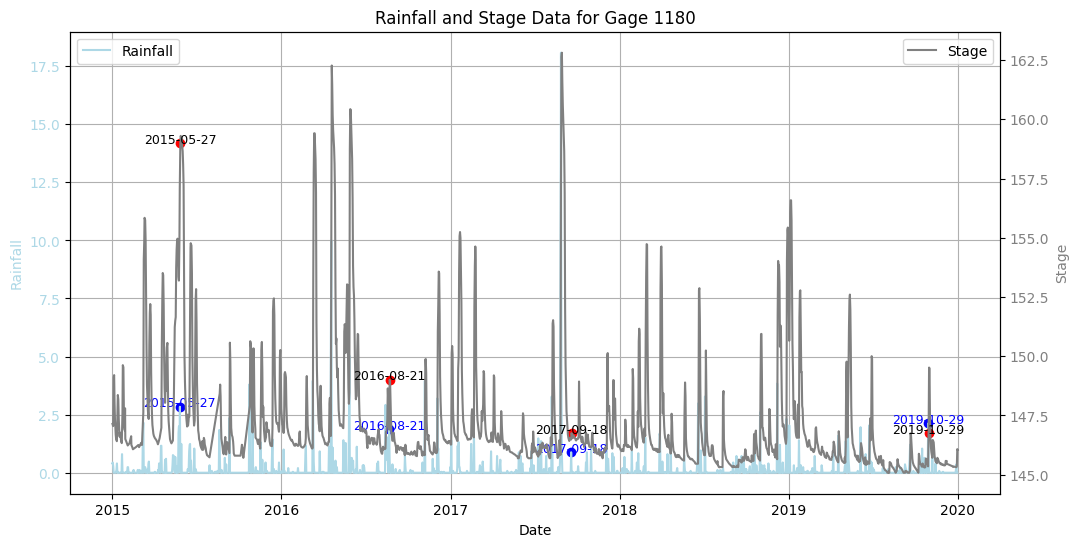

C:\Users\carri\AppData\Local\Temp\ipykernel_6672\2230386093.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rainfall_data['Date Only'] = rainfall_data['Reading Date From'].dt.date
C:\Users\carri\AppData\Local\Temp\ipykernel_6672\2230386093.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stage_data['Date Only'] = stage_data['Reading Date'].dt.date


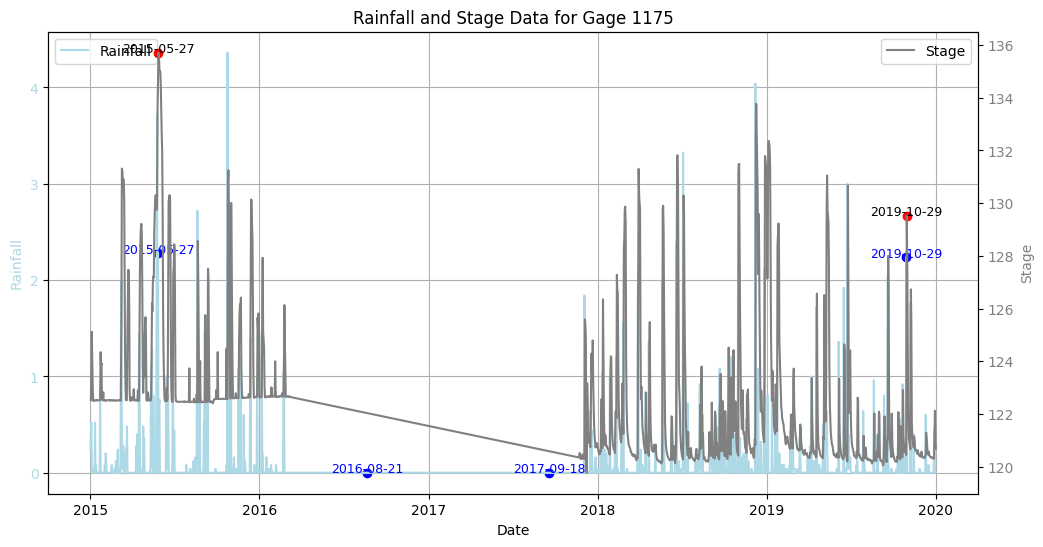

C:\Users\carri\AppData\Local\Temp\ipykernel_6672\2230386093.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rainfall_data['Date Only'] = rainfall_data['Reading Date From'].dt.date
C:\Users\carri\AppData\Local\Temp\ipykernel_6672\2230386093.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stage_data['Date Only'] = stage_data['Reading Date'].dt.date


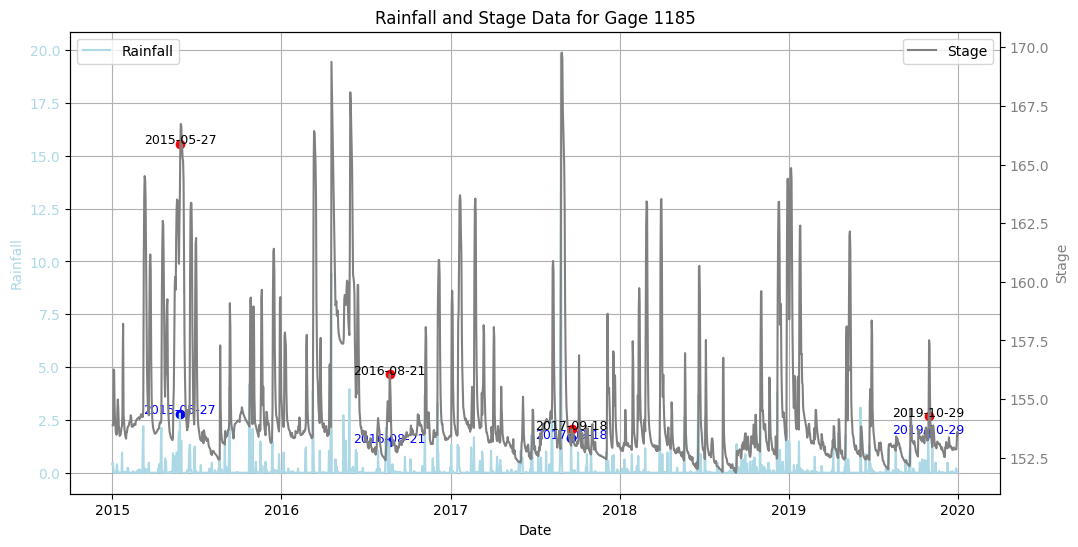

C:\Users\carri\AppData\Local\Temp\ipykernel_6672\2230386093.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rainfall_data['Date Only'] = rainfall_data['Reading Date From'].dt.date
C:\Users\carri\AppData\Local\Temp\ipykernel_6672\2230386093.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stage_data['Date Only'] = stage_data['Reading Date'].dt.date


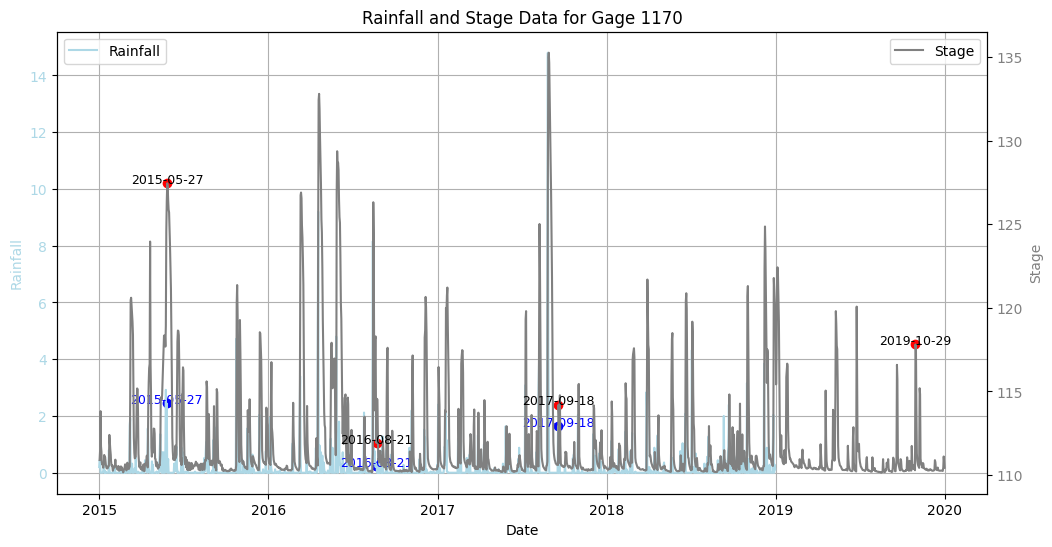

C:\Users\carri\AppData\Local\Temp\ipykernel_6672\2230386093.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rainfall_data['Date Only'] = rainfall_data['Reading Date From'].dt.date
C:\Users\carri\AppData\Local\Temp\ipykernel_6672\2230386093.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stage_data['Date Only'] = stage_data['Reading Date'].dt.date


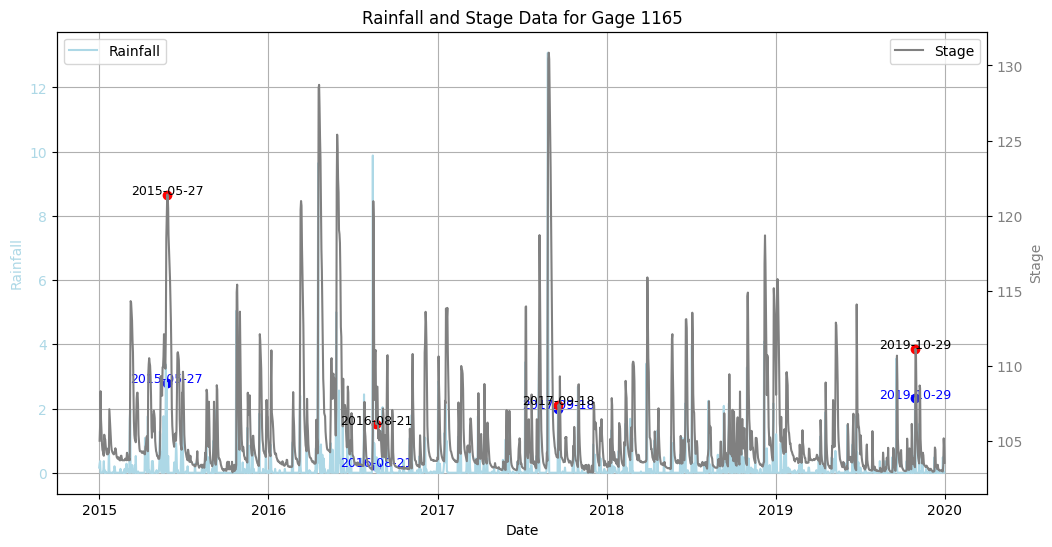

C:\Users\carri\AppData\Local\Temp\ipykernel_6672\2230386093.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rainfall_data['Date Only'] = rainfall_data['Reading Date From'].dt.date
C:\Users\carri\AppData\Local\Temp\ipykernel_6672\2230386093.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stage_data['Date Only'] = stage_data['Reading Date'].dt.date


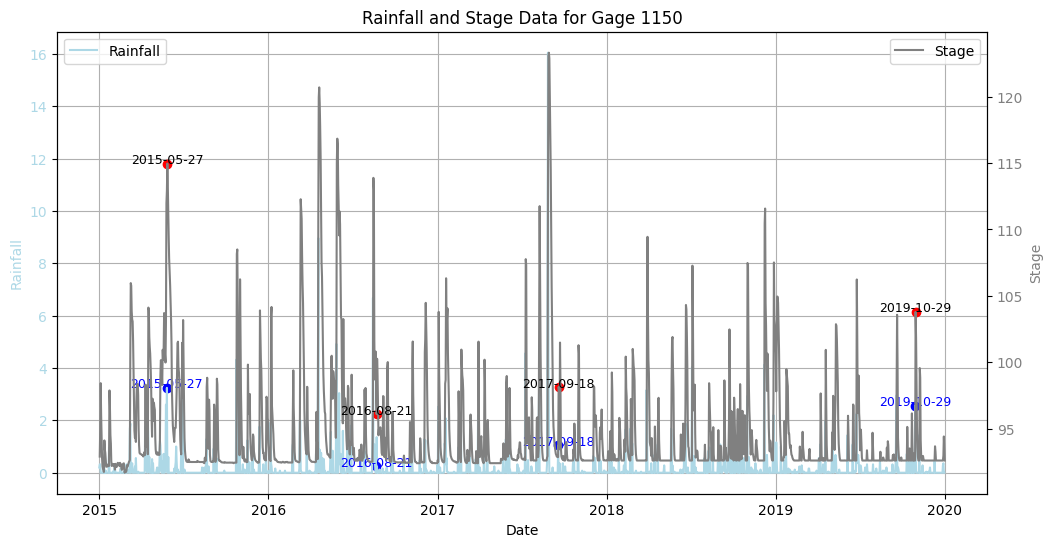

C:\Users\carri\AppData\Local\Temp\ipykernel_6672\2230386093.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rainfall_data['Date Only'] = rainfall_data['Reading Date From'].dt.date
C:\Users\carri\AppData\Local\Temp\ipykernel_6672\2230386093.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stage_data['Date Only'] = stage_data['Reading Date'].dt.date


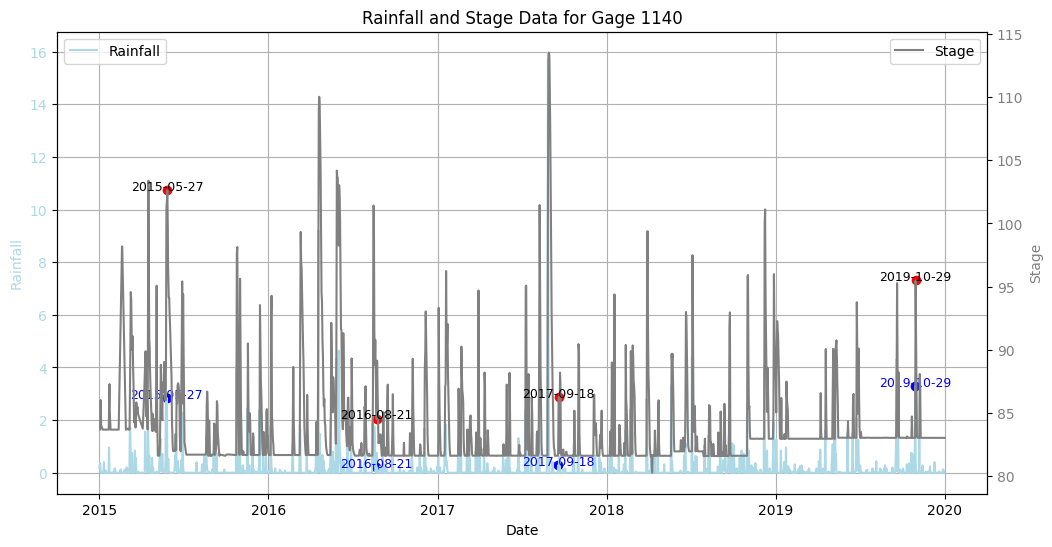

C:\Users\carri\AppData\Local\Temp\ipykernel_6672\2230386093.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rainfall_data['Date Only'] = rainfall_data['Reading Date From'].dt.date
C:\Users\carri\AppData\Local\Temp\ipykernel_6672\2230386093.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stage_data['Date Only'] = stage_data['Reading Date'].dt.date


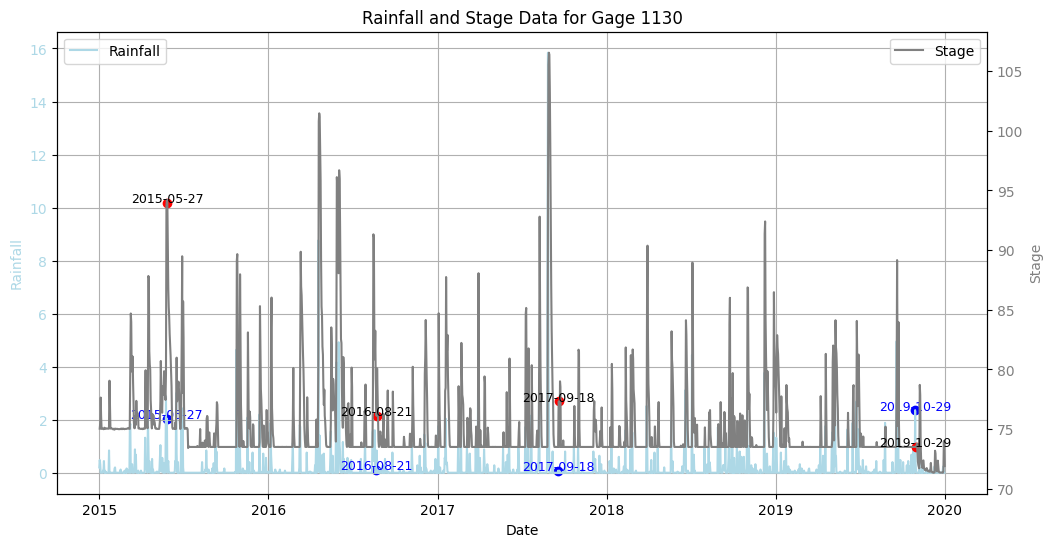

C:\Users\carri\AppData\Local\Temp\ipykernel_6672\2230386093.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rainfall_data['Date Only'] = rainfall_data['Reading Date From'].dt.date
C:\Users\carri\AppData\Local\Temp\ipykernel_6672\2230386093.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stage_data['Date Only'] = stage_data['Reading Date'].dt.date


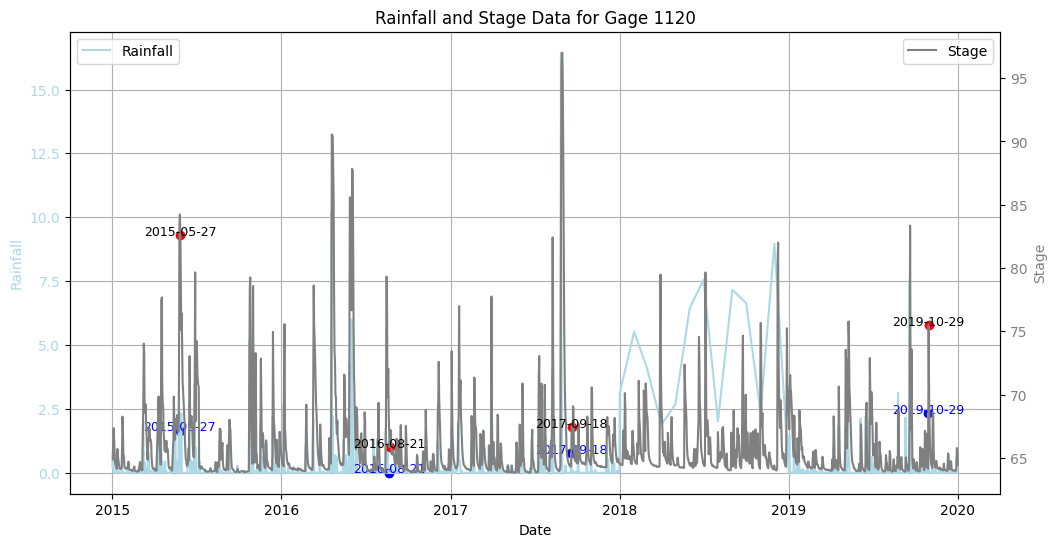

C:\Users\carri\AppData\Local\Temp\ipykernel_6672\2230386093.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rainfall_data['Date Only'] = rainfall_data['Reading Date From'].dt.date
C:\Users\carri\AppData\Local\Temp\ipykernel_6672\2230386093.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stage_data['Date Only'] = stage_data['Reading Date'].dt.date


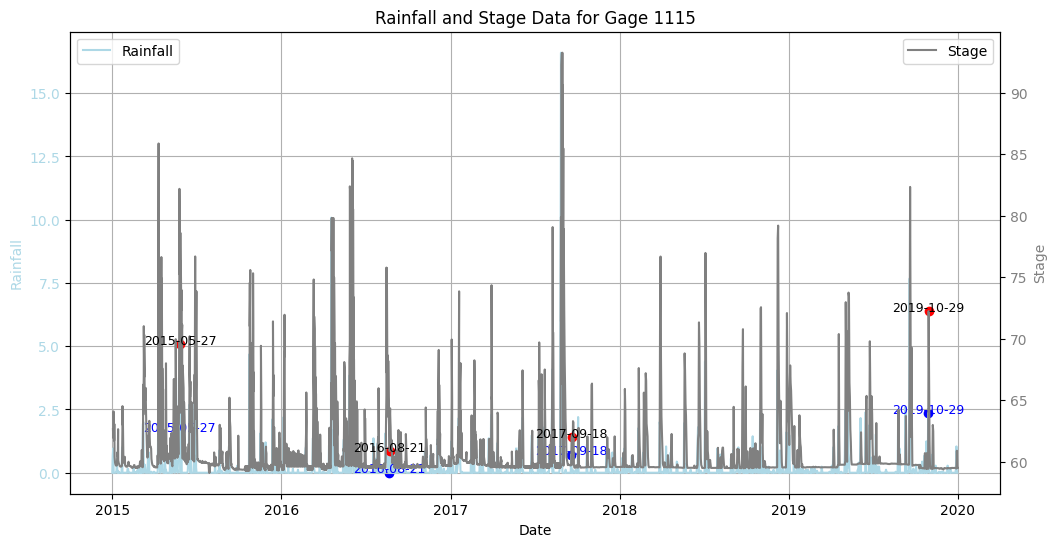

C:\Users\carri\AppData\Local\Temp\ipykernel_6672\2230386093.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rainfall_data['Date Only'] = rainfall_data['Reading Date From'].dt.date
C:\Users\carri\AppData\Local\Temp\ipykernel_6672\2230386093.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stage_data['Date Only'] = stage_data['Reading Date'].dt.date


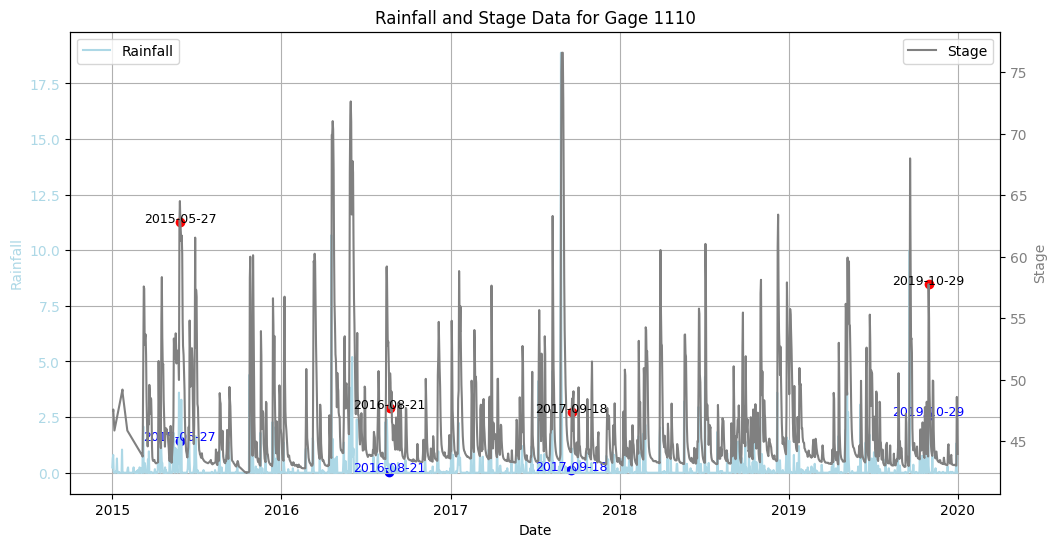

In [6]:

# Example DataFrames with example data
# rainfall_all and stage_all should already be defined and contain your data

# Convert 'Reading Date From' and 'Reading Date' to datetime if not already
rainfall_all['Reading Date From'] = pd.to_datetime(rainfall_all['Reading Date From'])
stage_all['Reading Date'] = pd.to_datetime(stage_all['Reading Date'])

gages = rainfall_all['Gage Number'].unique()

# Global list of dates to annotate
annotation_dates = ['2019-10-29', "2017-09-18", "2016-08-21", "2015-05-27"]  # Replace with your specific dates

# Convert annotation_dates to datetime objects (date only)
annotation_dates = pd.to_datetime(annotation_dates).date

for gage in gages:
    # Filter data for the current gage
    rainfall_data = rainfall_all[rainfall_all['Gage Number'] == gage]
    stage_data = stage_all[stage_all['Gage Number'] == gage]

    # Extract date only
    rainfall_data['Date Only'] = rainfall_data['Reading Date From'].dt.date
    stage_data['Date Only'] = stage_data['Reading Date'].dt.date

    # Create the plot
    fig, ax1 = plt.subplots(figsize=(12, 6))
    
    # Plot rainfall data on the first y-axis
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Rainfall', color='lightblue')
    ax1.plot(rainfall_data['Reading Date From'], rainfall_data['Rain'], color='lightblue', label='Rainfall')
    ax1.tick_params(axis='y', labelcolor='lightblue')
    
    # Create a second y-axis for stage data
    ax2 = ax1.twinx()
    ax2.set_ylabel('Stage', color='gray')
    ax2.plot(stage_data['Reading Date'], stage_data['Elevation'], color='gray', label='Stage')
    ax2.tick_params(axis='y', labelcolor='gray')

    # Add title and legends
    plt.title(f'Rainfall and Stage Data for Gage {gage}')
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')

    # Annotate specific dates
    for date in annotation_dates:
        # Annotate on rainfall plot if date exists
        if date in rainfall_data['Date Only'].values:
            rainfall_value = rainfall_data[rainfall_data['Date Only'] == date]['Rain'].values[0]
            date_time = rainfall_data[rainfall_data['Date Only'] == date]['Reading Date From'].values[0]
            ax1.scatter(date_time, rainfall_value, color='blue', marker='o')  # Add point
            ax1.text(date_time, rainfall_value, f'{date}', color='blue', fontsize=9, ha='center')
        
        # Annotate on stage plot if date exists
        if date in stage_data['Date Only'].values:
            stage_value = stage_data[stage_data['Date Only'] == date]['Elevation'].values[0]
            date_time = stage_data[stage_data['Date Only'] == date]['Reading Date'].values[0]
            ax2.scatter(date_time, stage_value, color='red', marker='o')  # Add point
            ax2.text(date_time, stage_value, f'{date}', color='black', fontsize=9, ha='center')

    # Add gridlines
    ax1.grid(True)

    # Show or save the plot
    plt.show()
    # plt.savefig(f'gage_{gage}_plot.png')  # Uncomment to save plots as files
